In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.image as mpimg

In [3]:
def get_dataset():
    path='E:\\cnns\\digit_prediction\\digit_'
    Y_list=[6]
    X=mpimg.imread('E:\\cnns\\digit_prediction\\digit_6\\digit6__4cc17a78-77e9-11e7-8382-0af8d8ef1070.jpg')
    X=X[:,:,1]
    X=X[np.int64(np.linspace(0,199,64))]
    X=X.T
    X=X[np.int64(np.linspace(0,199,64))]
    X=X.T
    X=X.reshape(1,64,64)
    
    
    for digit in range(0,10):
        no_of_examples=len(glob.glob('E:\\cnns\\digit_prediction\\digit_'+str(digit)+'\\*'))
        examples=glob.glob('E:\\cnns\\digit_prediction\\digit_'+str(digit)+'\\*')
        for i in examples:
            img=mpimg.imread(i)
            img=img[:,:,1]
            w=img.shape[0]
            h=img.shape[1]
            if w>=64 and h>=64:
                img=img[np.int64(np.linspace(0,w-1,64))]
                img=img.T
                img=img[np.int64(np.linspace(0,h-1,64))]
                img=img.T
                position=np.random.randint(X.shape[0])
                X=np.insert(X,position,values=img,axis=0)
                Y_list.insert(position,digit)
    Y=np.array(Y_list)
    return (X,Y)
    
    
            
            
            

In [4]:
def normalize(X_train):
    m=len(X_train)
    mean=(1/m)*np.sum(X_train,axis=0,keepdims=True)
    X_train=X_train-mean
    variance=np.sum(np.square(X_train),axis=0,keepdims=True)
    std=np.sqrt(variance)
    X_train=X_train/std
    return X_train
    

# preparing data

In [4]:
X,Y=get_dataset()

In [281]:
X_train=X/255.

In [6]:
df_Y=pd.DataFrame(Y)

In [7]:
# df=pd.get_dummies(df_Y[0])

In [8]:
Y_train=np.array(df_Y)

In [9]:
Y_train.shape

(6144, 1)

In [282]:
X_train.shape

(6144, 64, 64)

# architecture

In [11]:
import tensorflow as tf

In [12]:
from tensorflow import keras

In [13]:
from tensorflow.keras import layers


In [337]:
model=tf.keras.Sequential()

In [338]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(64,64,1),activation='relu',kernel_regularizer='l2'))

In [339]:
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [340]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),activation='relu'))

In [341]:
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [342]:
model.add(tf.keras.layers.Flatten())

In [343]:
model.add(tf.keras.layers.Dense(1024,activation='relu',kernel_regularizer='l2'))


In [344]:
model.add(tf.keras.layers.Dense(256,activation='relu',kernel_regularizer='l2'))


In [345]:
model.add(tf.keras.layers.Dense(20,activation='relu',kernel_regularizer='l2'))

In [346]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [347]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [348]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 32)        18464     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 1024)              1606656   
_________________________________________________________________
dense_68 (Dense)             (None, 256)             

# training

In [ ]:
history=model.fit(X_train.reshape(6144,64,64,1)[1000:,:,:,:], Y_train[1000:,:], epochs=5)

Train on 5144 samples
Epoch 1/5
4288/5144 [========================>.....] - ETA: 3s - loss: 0.9514 - accuracy: 0.8216

999/999 - 1s - loss: 1.0438 - accuracy: 0.8028


[1.0438273649912577, 0.8028028]

In [168]:
model.save('weights.h5')

Text(0, 0.5, 'accuracy')

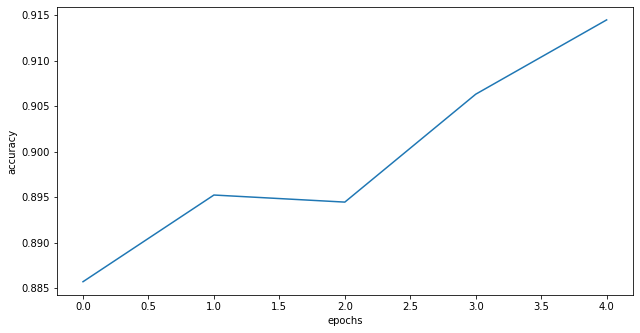

In [335]:
fig=plt.figure(figsize=(8,4))
axes=fig.add_axes([0,0,1,1])
axes.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
# plt.xticks([])
# plt.yticks([])

In [301]:
fig.savefig('accuracy.jpg')

# verification

In [352]:
model.evaluate(X_train.reshape(6144,64,64,1)[1:1000,:,:,:],Y_train[1:1000,:], verbose=2)

999/999 - 1s - loss: 1.1315 - accuracy: 0.7618


[1.1315061281154584, 0.7617618]

In [315]:
def plot_values_array(predictions,Y):
    thisplot=plt.bar(range(10),predictions,color='green')
    thisplot[np.argmax(predictions)].set_color='red'
    thisplot[Y].set_color='blue'
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.xlabel(f"{str(Y)} is predicted as {np.argmax(predictions)}")
    

In [313]:
predictions=model.predict(X_train[0:1000].reshape(1000,64,64,1))

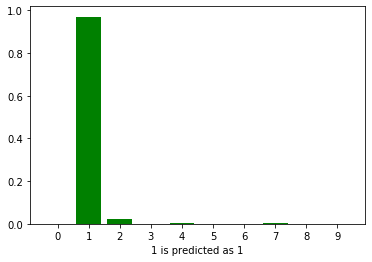

In [332]:
i=100
plot_values_array(predictions[i],np.squeeze(Y_train[i]))


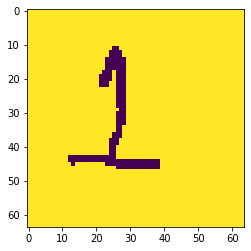

In [333]:
plt.imshow(X_train[i])

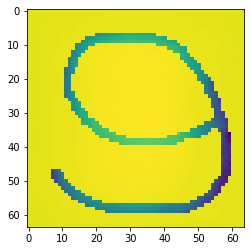

In [138]:
plt.imshow(X_train[12])

In [188]:
np.int64(model.predict(X_train[51].reshape(1,64,64,1))==np.max(model.predict(X_train[51].reshape(1,64,64,1))))

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [189]:
Y_train[51]

array([8])